# Identificar fronteras no lineales

In [79]:
import numpy as np
from sklearn.datasets.samples_generator import make_circles, make_blobs
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [80]:
X, Y = make_circles(n_samples=100, factor=0.1, noise=0.1)

In [81]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
        
    xlim = ax.get_xlim() # [xlim[0], xlim[1]] -> Límite inferior y superior del eje X
    ylim = ax.get_ylim() # [ylim[0], ylim[1]] -> Límite inferior y superior del eje Y
    
    #Generamos la parrilla de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    #Evaluar el modelo
    xy = np.vstack([X.ravel(), Y.ravel()]).T #Tupla
    P = model.decision_function(xy).reshape(X.shape)
    
    #Representamos las fronteras y los márgenes del SVC
    ax.contour(X, Y, P, colors = "k", levels = [-1,0,1], alpha = 0.5, linestyles=["--","-","--"])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:,1],
                  s = 300, linewidth = 1, facecolors="blue")
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

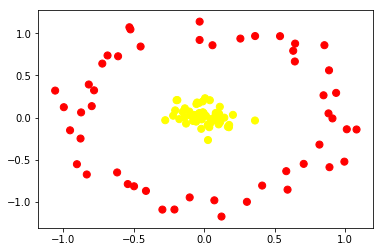

In [82]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

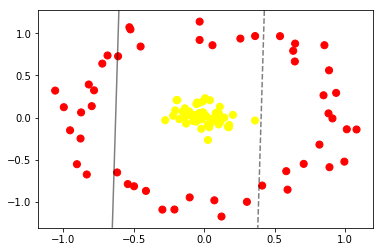

In [83]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(SVC(kernel="linear").fit(X,Y), plot_support=False)

In [84]:
r = np.exp(-(X**2).sum(1))

In [85]:
from mpl_toolkits import mplot3d

In [86]:
def plot_3D(elev=30, azim=30, X=X, Y=Y, r=r):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0], X[:,1], r, c=Y, s=50, cmap="autumn")
    ax.view_init(elev=elev, azim=azim)
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("x[1]")
    ax.set_zlabel("r")

In [87]:
from ipywidgets import interact, fixed
interact(plot_3D, elev=[-90,-60,-30,0,30,60,90], 
         azim=[-180,-150,-120,-90,-60,-30,0,30,60,90,120,150,180], 
         X=fixed(X), Y=fixed(Y), r=fixed(r))


interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 8.24611766e-02,  5.52827458e-02],
       [-1.02610828e-01, -9.48044630e-01],
       [-2.19913631e-01,  2.24782637e-02],
       [ 5.38293233e-01,  9.67124766e-01],
       [-3.75752382e-02,  1.73008860e-01],
       [ 1.05892935e-01,  4.48617353e-02],
       [-1.36836870e-01,  1.10201461e-01],
       [-7.81076224e-01,  3.23713286e-01],
       [ 5.91012420e-02,  8.59422594e-01],
       [ 6.43346951e-01,  6.66420791e-01],
       [ 7.23363043e-02, -9.82621324e-01],
       [-4.97429670e-01, -8.15758829e-01],
       [ 9.36210167e-01,  2.93459833e-01],
       [ 1.22982406e-01, -1.17528019e+00],
       [-5.30351633e-01,  1.07297898e+00],
       [ 3.60539988e-01, -3.45646318e-02],
       [-1.90280298e-01,  2.08095897e-01],
       [ 1.01176343e+00, -1.38739083e-01],
       [-4.50866610e-01,  8.43971609e-01],
       [ 2.71823960e-02, -2.66527463e-01],
       [ 7.62742768e-02, -2.79111409e-02],
       [ 8.85900581e-01,  5.61393949e-01],
       

In [88]:
rbf = SVC(kernel="rbf", C=1E6) #Radial basis function
rbf.fit(X,Y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

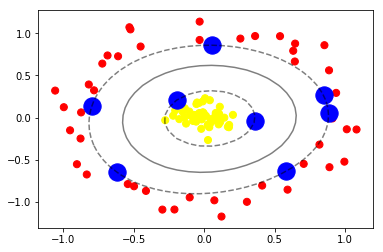

In [89]:
#Pintamos los puntos
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap = "autumn")
#Incorporamos las líneas
plt_svc(rbf)
plt.scatter(rbf.support_vectors_[:,0], rbf.support_vectors_[:,1], s=300, linewidth=1, facecolors="none")

## Ajustar los parámetros de SVM

In [90]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)

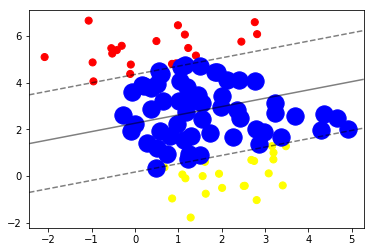

In [91]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
model = SVC(kernel="linear", C=0.01)
model.fit(X,Y)
plt_svc(model)

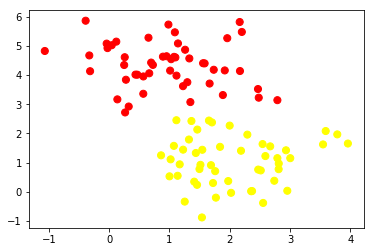

In [92]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

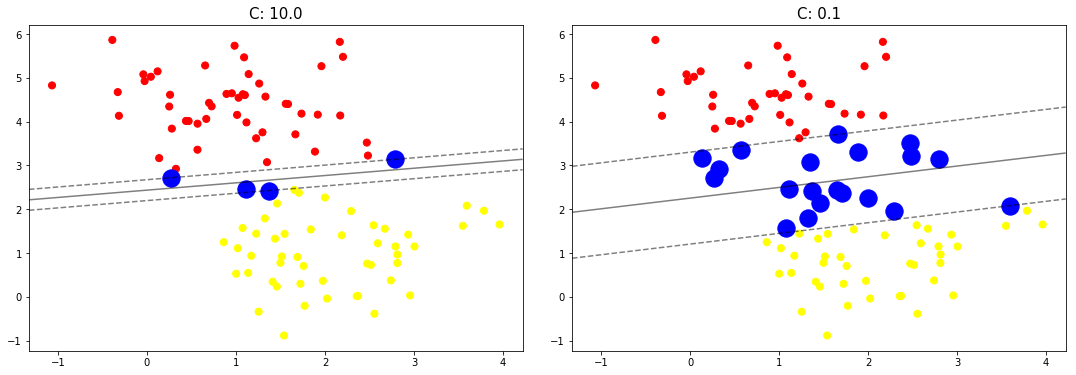

In [93]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.05, right=0.95, wspace= 0.1)

for ax_i, C in zip(ax,[10.0,0.1]):
    model = SVC(kernel="linear", C=C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0],X[:,1], c=Y, s=50, cmap="autumn")
    plt_svc(model, ax_i)
    ax_i.set_title("C: {}".format(C), size=15)